In [2]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tifffile import imread
from csbdeep.utils import Path, normalize

from stardist import random_label_cmap, _draw_polygons
from stardist.models import StarDist2D

np.random.seed(6)
lbl_cmap = random_label_cmap()

In [3]:
X_xy = sorted(glob('../dataSet/testing/data1/xy/*.tif'))
X_xy = list(map(imread,X_xy))
X_xz = sorted(glob('../dataSet/testing/data2/xz/*.tif'))
X_xz = list(map(imread,X_xz))
X_yz = sorted(glob('../dataSet/testing/data1/yz/*.tif'))
X_yz = list(map(imread,X_yz))

### Load the trained model

In [7]:
model = StarDist2D(None, name='LIB100_70nm', basedir='../models')
# model = StarDist2D(None, name='LIB100', basedir='../models')
#model = StarDist2D(None, name='LIB', basedir='../models')

Loading network weights from 'weights_best.h5'.
Couldn't load thresholds from 'thresholds.json', using default values. (Call 'optimize_thresholds' to change that.)
Using default values: prob_thresh=0.5, nms_thresh=0.4.


In [21]:
axis_norm = (0,1)
def example(model,path, X, i, show_dist=True):
    img = normalize(X[i], 1,99.8, axis=axis_norm)
    print(img.ndim)
    
    temp, probmaps = model.predict(img) # note using the predict function, also have a look at predict_direct function
    #probmap = np.sum(probmaps,axis=2) # note the size of prob map
    probmap = np.mean(probmaps,axis=2)
    #probmap = np.max(probmaps,axis=2)
    labels, temp= model.predict_instances(img)

    ax = plt.figure(figsize=(13,10))
    img_show = img if img.ndim==2 else img[...,:3]
    plt.subplot(131); plt.imshow(img_show, cmap='gray'); plt.axis('off')
    plt.subplot(132); plt.imshow(img_show, cmap='gray'); plt.axis('off')
    plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
    plt.subplot(133); plt.imshow(probmap, cmap='gray'); plt.axis('off')
    plt.tight_layout()
    plt.show()
    #ax.savefig(path+"/slice_"+ format(i, '05')+".tif")

2


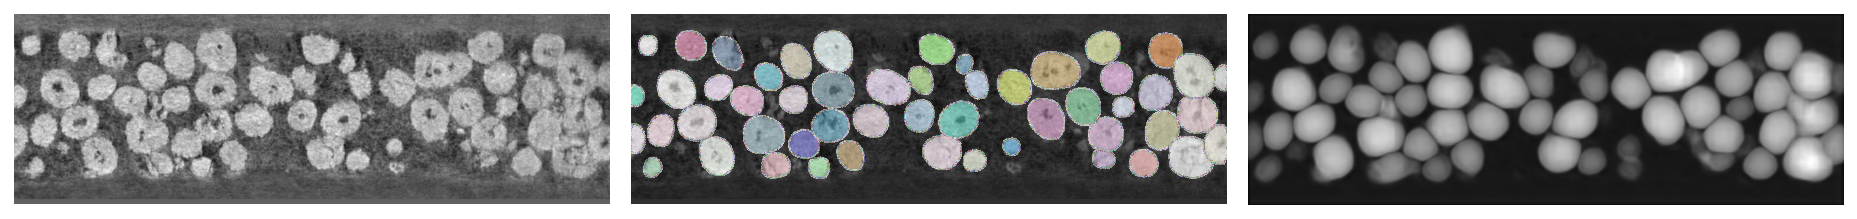

In [22]:
example(model,'RT_Results', X_xz, 100)

## Save the probability maps

In [15]:
from tifffile import imsave
axis_norm = (0,1)
def save_prob(model,path, X):
    for index in range(len(X)):
        print('predicting '+ str(index) + 'th image')
    
        img = normalize(X[index], 1,99.8, axis=axis_norm)
    
        temp, probmaps = model.predict(img) # note using the predict function, also have a look at predict_direct function
        #probmap = np.sum(probmaps,axis=2) # note the size of prob map
        probmap = np.mean(probmaps,axis=2)
        #probmap = np.max(probmaps,axis=2)

        imsave(path+"/slice_"+ format(index, '05')+".tif", probmap)

In [18]:
save_prob(model,'prob/xy', X_xy)
save_prob(model,'prob/xz', X_xz)
save_prob(model,'prob/yz', X_yz)

predicting 0th image
predicting 1th image
predicting 2th image
predicting 3th image
predicting 4th image
predicting 5th image
predicting 6th image
predicting 7th image
predicting 8th image
predicting 9th image
predicting 10th image
predicting 11th image
predicting 12th image
predicting 13th image
predicting 14th image
predicting 15th image
predicting 16th image
predicting 17th image
predicting 18th image
predicting 19th image
predicting 20th image
predicting 21th image
predicting 22th image
predicting 23th image
predicting 24th image
predicting 25th image
predicting 26th image
predicting 27th image
predicting 28th image
predicting 29th image
predicting 30th image
predicting 31th image
predicting 32th image
predicting 33th image
predicting 34th image
predicting 35th image
predicting 36th image
predicting 37th image
predicting 38th image
predicting 39th image
predicting 40th image
predicting 41th image
predicting 42th image
predicting 43th image
predicting 44th image
predicting 45th imag